# Chapter 2 - End-to-End Machine Learning Project

In a ML project, you need to walk through the following steps:

1. Look at the big picture
2. Get the data.
3. Explore and visualize the data to gain insights
4. Prepare the data for machine learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## Working with Real Data

To learn ML properly, try to use real-world data. A few popular open data repositories can help you with that:

- https://www.openml.org
- https://www.kaggle.com
- https://paperswithcode.com
- UC Irvine Machine Learning Repository: https://archive.ics.uci.edu
- Amazon's AWS datasets: https://registry.opendata.aws
- https://www.tensorflow.org/datasets

Portals wit lists of open data repositories:
- https://dataportals.org
- https://project.opendatamonitor.eu

Websites listing many popular open data repositories:
- Wikipedia: https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research
- Quora: https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public
- Reddit: https://www.reddit.com/r/datasets/

The following chapter will be about the California Housing Prices dataset from "R. Kelley Pace and Ronald Barry, “Sparse Spatial Autoregressions”, Statistics & Probability Letters 33, no. 3 (1997): 291–29". A visualisation of the data is shown below:

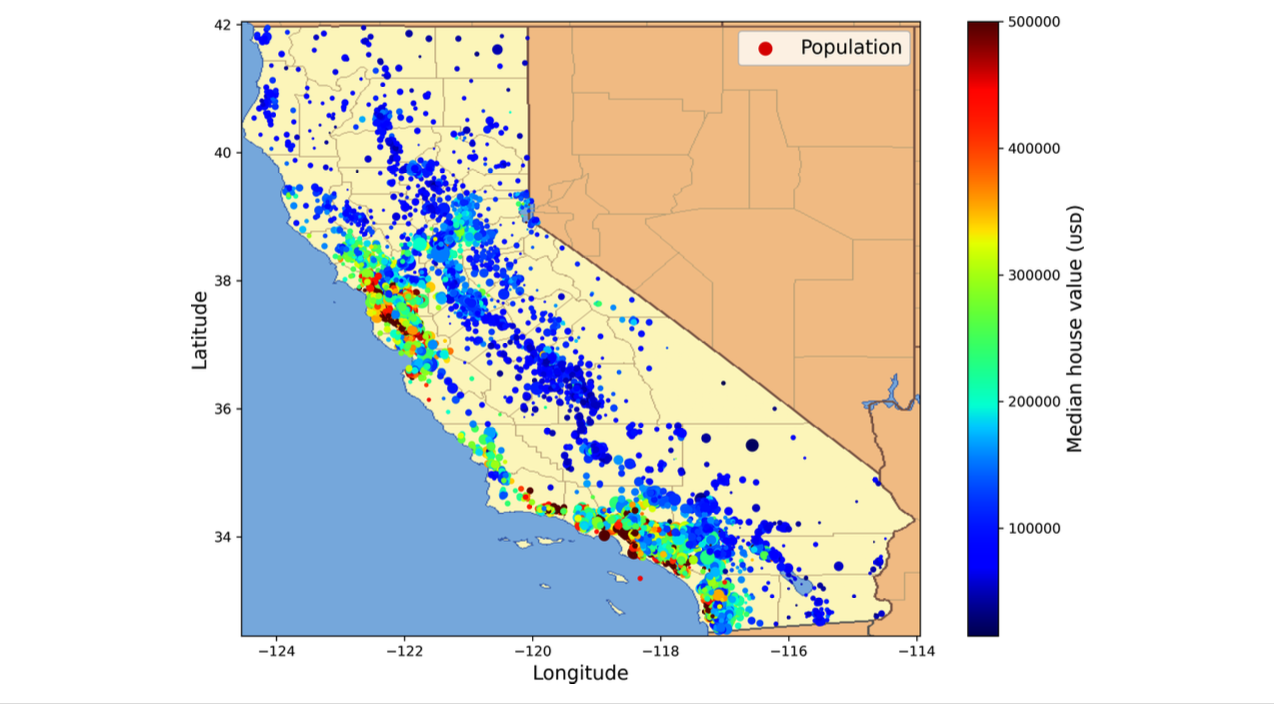

In [1]:
from IPython.display import Image

# Display an image from a file
Image(filename='images/book/ch02-housing-dataset.png')

## 1. Frame the Problem and Look at the Big Picture

**Task:** Build a model to predict housing prices in any district in the state of California.

**Dataset includes:** population, median income, and median housing price for each block group (smallest geographical unit for the dataset, ~districts) in California. 

    1.1. Define the objective in business terms. This ultimately determines how to frame the problem, which algorithms you will select, which performance measure to use to evaluate the model, and how much effort to spend in tweaking it.
    1.2. How will your solution be used?
    1.3. What are the current solutions/workarounds (if any)? This gives you a reference for performance and insight on how to solve the problem
    1.4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
    1.5. How should performance be measured?
    1.6. Is the performance measure aligned with the business objective?
    1.7. What would be the minimum performance needed to reach the business objective?
    1.8. What are comparable problems? Can you reuse experience or tools?
    1.9. Is human expertise available?
    1.10. How would you solve the problem manually?
    1.11. List the assumptions you (or others) have made so far.
    1.12. Verify assumptions if possible.

Just building a model is probably not the end goal. Natural questions are: How does the company expect to use and benefit from this model? 

**1.1. Objective:** The model output (a prediction of a district's median housing price) will be fed to another machine learning system, along with many other signals (information fed to a ML system). 

**1.2. Application:** The overall system will determine whether it is worth investing in a given area. Getting this right is critical, as it directly affects revenue.

**1.3. Current Solutions:** The district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules. In the cases of getting a median housing price, the estimates can be off by more than 30%. 

This tells you that the current solution is costly, time-consuming, and the estimates are not precise. So you would be looking for a cheaper, faster, and more precise model.

**1.4. Frame the problem:** This is where you start to design the system. What kind of training supervision will the model need? Is it a classification task, regression task, or something else? Batch learning or online learning? 

- my answer: I would use a supervised training algorithm since I would like to determine districts by their housing prices. Between Classification and Regression, I would choose Regression since the output is a target value for the housing price. I don't expect the data to change rapiditly and it might not be too big, so batch learning should work.
    
- Book answer: It is a typical supervised learning task with labeled examples. It is a **multiple regression** task, since the model will predict a value by using multiple features in the data. It is a **univariate regression**, since we are only predict a single value. For multiple values to predict, it would be a **multivariate regression**. Finally, batch learning should do just fine.

**1.5.-1.7. Performance Measure:** Typical performance measures for regression problems are the *root mean square error (RMSE)* and the *mean absolute error (MAE)*. 

* The RMSE gives an idea of how much error the system typically makes in its prediction, with a higher weight given to large errors. The mathematical formula is given by:
\begin{equation}
{\rm RMSE}(\mathbf{X},h)= \sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(h(\mathbf{x}^{(i)})-y^{(i)}\right)^2}
\end{equation}
with $m$ the number of instances in the dataset used for measuring the RMSE on, $\mathbf{x}^{(i)}$ a vector of all features of the $i^{\rm th}$ instance in the dataset, $y^{(i)}$ its label, $\mathbf{X}$ a matrix containing all the feature values (excluding labels) of all instances in the dataset, and $h$ the system's prediction function (*hypothesis*). The RMSE corresponds to the *Euclidean norm*, or $l_2$ norm, noted $||\cdot||_2$ or just $||\cdot||$.

* For data with many outliers, you may consider the MAE given by
\begin{equation}
{\rm MAE}(\mathbf{X},h)=\frac{1}{m}\sum_{i=1}^{m} |h(\mathbf{x}^{(i)}-y^{(i)}|
\end{equation}
This corresponds to *Manhattan norm*, or the $l_1$ norm

* More generally, the $l_k$ is defined as $||\mathbf{v}||_k=(|v_1|^k+|v_2|^k+...+|v_n|^k)^{1/k}$. $l_0$ gives the number of nonzero elements in a vector $\mathbf{v}$ and $l_{\infty}$ the maximum absolute value in the vector.

The higher the norm index, the more it focuses on large values and neglects small ones. This is why RMSE is more sensitive to outliers than the MAE. But if outliers are exponentially rare, the RMSE performs well and is generally preferred.

Take the performance measure that is more aligned with the business objective and decide what the minimum performance needed is to meet the business objectives.

**1.8:** -

**1.9.** -

**1.10.** -

**1.11. List of assumptions and check them:** What assumptions have been made so far by you or others? What kind of output format are you assuming? If the output of your system will be used only as "cheap", "medium", or "expensive" by the next ML system, you don't need to know the price perfectily precisely. Then the problem should have been framed as a classification task, not a regression task. After verifying that the actual prices are needed, and clarifying all other assumptions, the coding part can be started

## 2. Get the Data

### Download the Data

Typical environments provide data in a relational database or some other common data store with multiple tables/documents/files, and you need to familiarize yourself with the data. Here it is much simpler and the data can be downloaded in a single compressed file *housing.tgz*. which contains a comma-separated values (CSV) files.  

We run some basic functions at the beginning of every notebook:

In [2]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

and we download the data with ``load_housing_data()`` which looks for the *datasets/housing.tgz* file and if it doesn't exist, it creates the datasets directory inside the current directory, downloads the *housing.tgz* from the book's GitHub website and extracts its content. This creates a *datasets/housing* directory with the *housing.tgz* file in it. Finally, the function loads the CSV file into a Pandas DataFrame object containing all the data and returns it:

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

### Take a Quick Look at the Data Structure

The top five rows in the dataset are given by:

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district, with 10 attributes. For more information, we call ``info()`` to get a quick description of the data, like the total number of rows, each attribute's type, and the number of non-null values:

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The dataset contains 20,640 instances. You notice that the ``total_bedrooms`` attributes has only only 20,433 non-null values out of 20,640, meaning that 207 districuts are missing this feature. You will need to take care of this later. All attributes are numerical, except ``ocean_proximity`` of type ``object`` which could hold any kind of Python object. In our case, this must be a text attribute. And since they repeat already in the first 5 rows, it is probably a categorical attribute. To find out which categories this attributes contains, you can use

In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

With the ``describe()`` method, we can call a summary of the numerical attributes

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The `25%`, `50%`, and `75%` rowsshow the corresponding *percentiles*, indicating the value below which a given percentage of observations in a group of observations fall. Another way to geta feel of the type of data is to plot a histogram for each numerical attribute

In [8]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

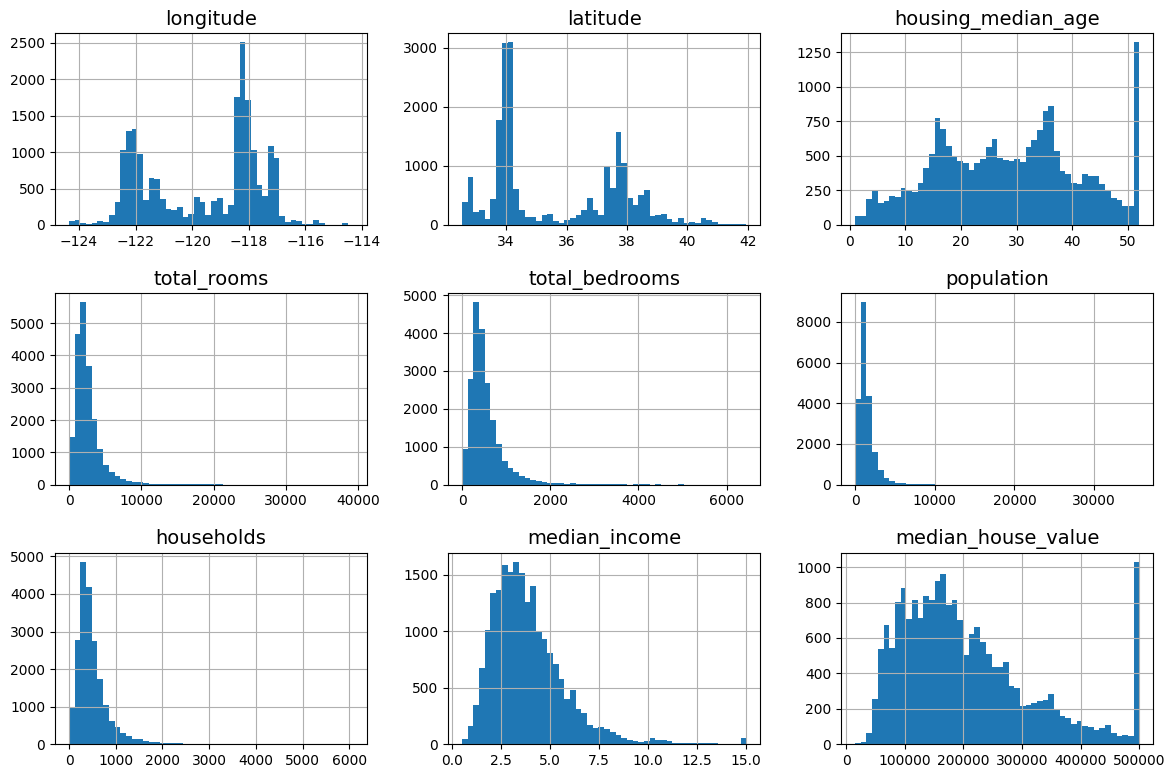

In [9]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

A few things can be noticed by looking at the histograms (but have to be checked with the team responsible for the data):

* The numbers represent roughly tens of thousands of dollars. So 3 translates to 30,000, for example. Besides, the data has ben capped at 0.5 and 15. 
* The housing median age and median house value were also capped. The latter might be a problem since this is your label. The prices never go beyond a certan limitand your ML algorithm might learn that price as an upper limit. If you need predictions above $500,000, there are two options:
    * Collect proper labels for the districts whose labels were capped
    * Remove those districts from the training (and test set)
* The attributes have very different scales.
* The histograms are *skewed right*. This means that the histograms extend much farther to the right of the median than to the left. This may make it harder for some ML algorithms to detect patterns. It can be solved by transforming these attributes to have more symmetrical and bell-shaped distributions.

### Create A Test Set